In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.circuit import Parameter
from qiskit_aer import AerSimulator

simulator = AerSimulator()

In [2]:
π = np.pi
φ = Parameter('φ')

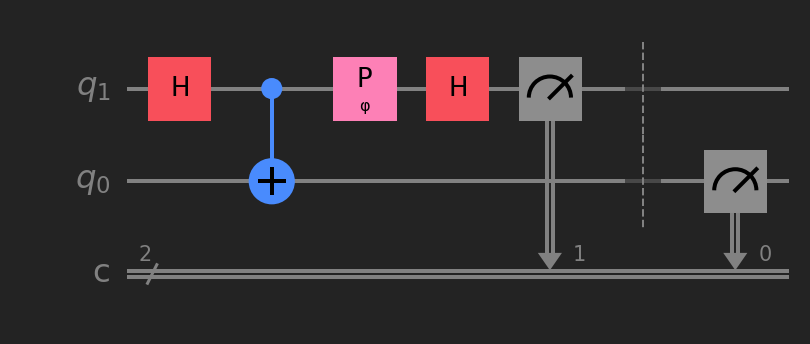

In [3]:
qc1 = QuantumCircuit(2,2)
qc1.h(1)
qc1.cx(1,0)
qc1.p(φ,1)
qc1.h(1)
qc1.measure(1,1)
qc1.barrier()
qc1.measure(0,0)
qc1.draw()

In [4]:
qc1_trans = transpile(qc1, backend=simulator)

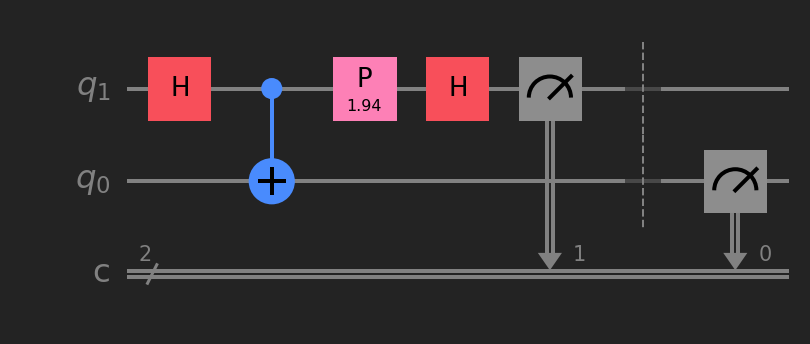

In [5]:
runs = 8192
φ_lst1 = np.random.uniform(-3*π,3*π,runs)

circuits1 = []

for φ_val in φ_lst1:
    qc1_sim = qc1_trans.assign_parameters({φ:φ_val})
    circuits1.append(qc1_sim)
    
circuits1[6].draw()

In [6]:
job1 = simulator.run(circuits1, shots=1, memory=True)
sim_results1 = job1.result()

In [7]:
φ_hit1_t = []
φ_hit1_b = []

for i, circ in enumerate(circuits1):
    result = sim_results1.get_memory(circ)[0]
    if result[0] == '0':
        if result[1] == '0':
            φ_hit1_t.append(φ_lst1[i])
        else:
            φ_hit1_b.append(φ_lst1[i])

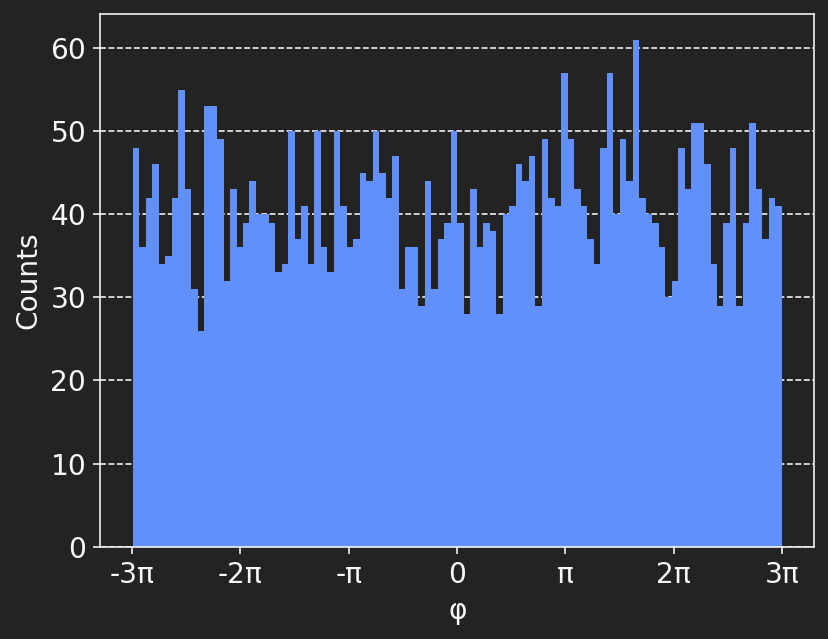

In [24]:
ax = plt.subplot()
plt.hist(φ_hit1_t+φ_hit1_b, bins=100, color='#6190fb')
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.grid(axis='y',linestyle='dashed')
ax.set_axisbelow(True)
plt.show()

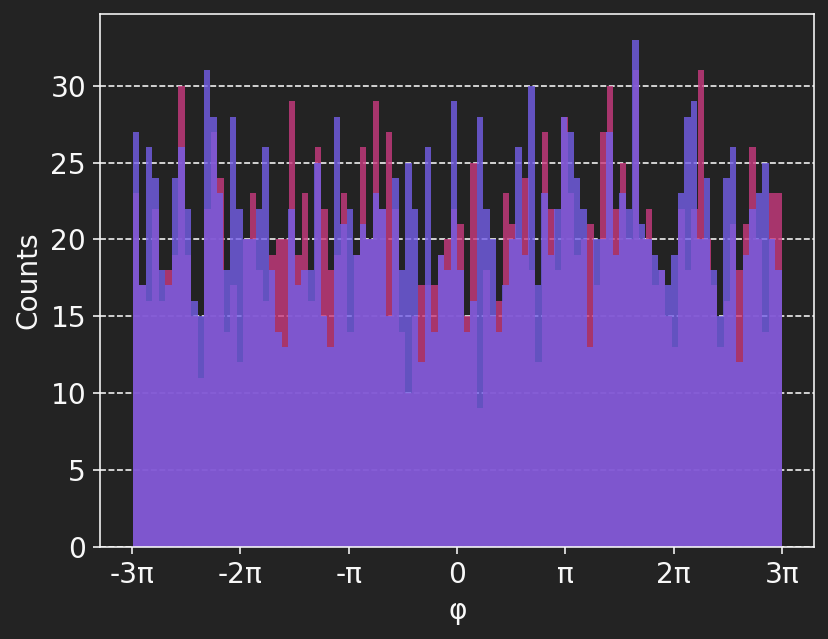

In [9]:
ax = plt.subplot()
plt.hist(φ_hit1_t, bins=100, color='#c93a7f',alpha=0.8)
plt.hist(φ_hit1_b, bins=100, color='#745fe8',alpha=0.8)
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.grid(axis='y',linestyle='dashed')
ax.set_axisbelow(True)
plt.show()

In [10]:
z_hit1_t = np.random.uniform(-1,1,len(φ_hit1_t))
z_hit1_b = np.random.uniform(-1,1,len(φ_hit1_b))

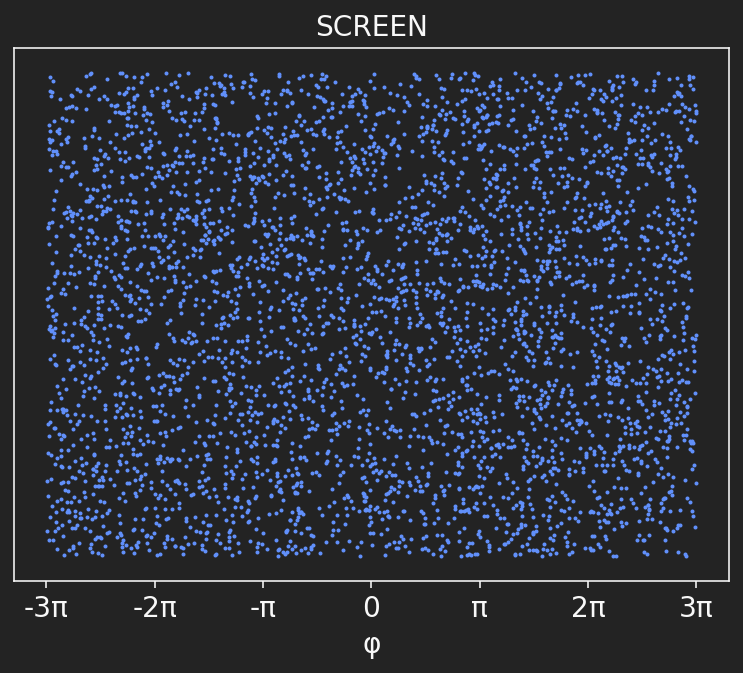

In [11]:
plt.scatter(φ_hit1_t+φ_hit1_b,np.append(z_hit1_t,z_hit1_b), s = 1, color='#6190fb')
plt.tick_params(axis='both', left=False, labelleft=False)
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.title('SCREEN', fontsize=14)
plt.show()

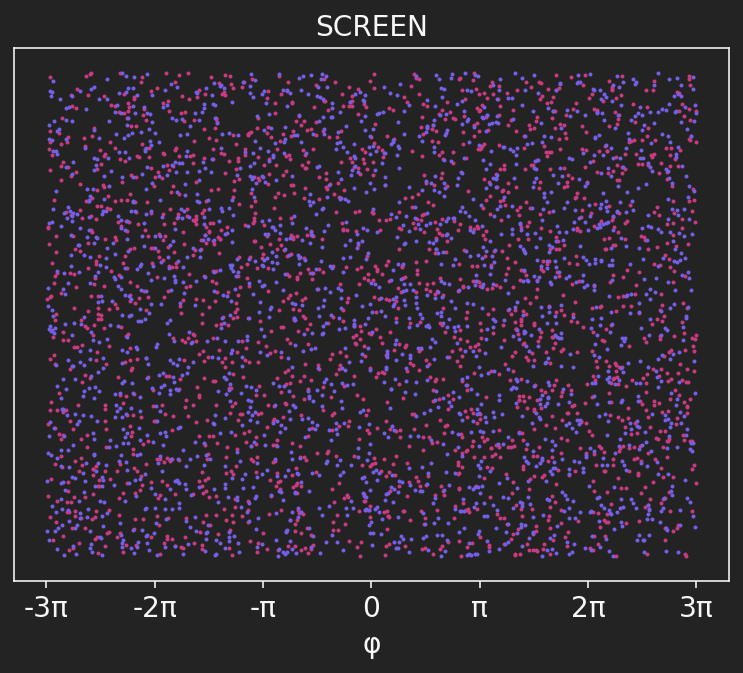

In [12]:
plt.scatter(φ_hit1_t,z_hit1_t, s = 1, color='#c93a7f')
plt.scatter(φ_hit1_b,z_hit1_b, s = 1, color='#745fe8')
plt.tick_params(axis='both', left=False, labelleft=False)
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.title('SCREEN', fontsize=14)
plt.show()

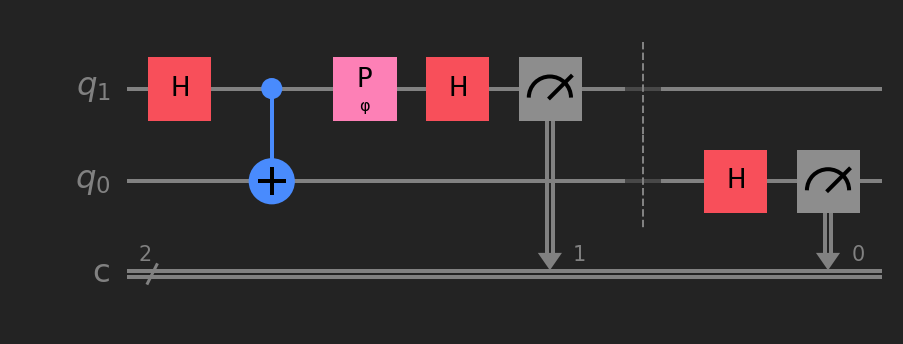

In [13]:
qc2 = QuantumCircuit(2,2)
qc2.h(1)
qc2.cx(1,0)
qc2.p(φ,1)
qc2.h(1)
qc2.measure(1,1)
qc2.barrier()
qc2.h(0)
qc2.measure(0,0)
qc2.draw()

In [14]:
qc2_trans = transpile(qc2, backend=simulator)

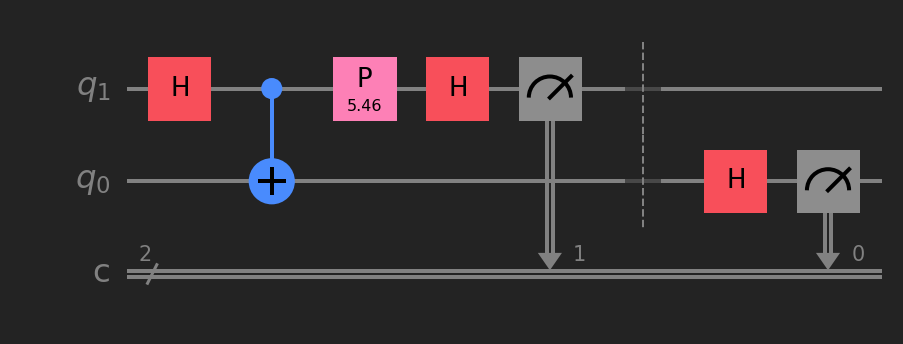

In [15]:
runs = 8192
φ_lst2 = np.random.uniform(-3*π,3*π,runs)

circuits2 = []

for φ_val in φ_lst2:
    qc2_sim = qc2_trans.assign_parameters({φ:φ_val})
    circuits2.append(qc2_sim)
    
circuits2[4].draw()

In [16]:
job2 = simulator.run(circuits2, shots=1, memory=True)
sim_results2 = job2.result()

In [17]:
φ_hit2_t = []
φ_hit2_b = []

for i, circ in enumerate(circuits2):
    result = sim_results2.get_memory(circ)[0]
    if result[0] == '0':
        if result[1] == '0':
            φ_hit2_t.append(φ_lst2[i])
        else:
            φ_hit2_b.append(φ_lst2[i])

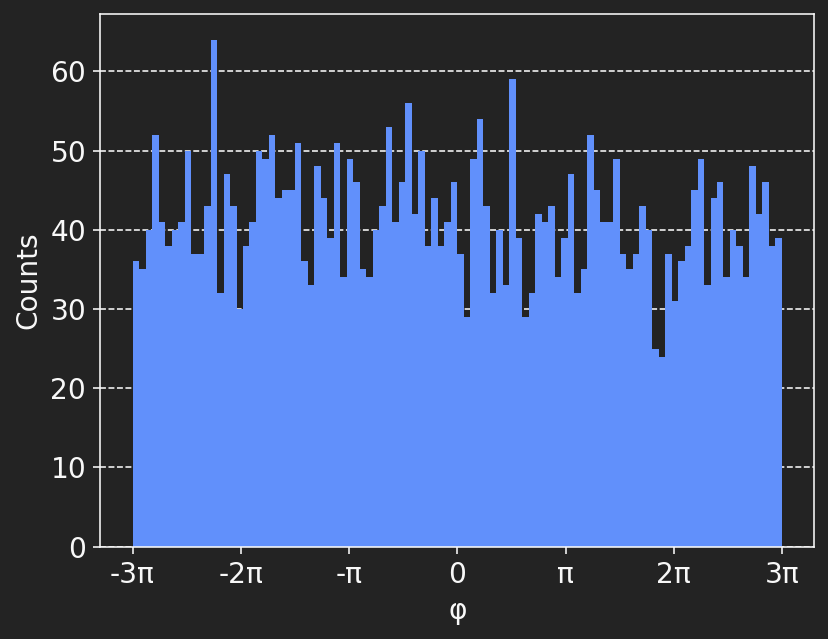

In [18]:
ax = plt.subplot()
plt.hist(φ_hit2_t+φ_hit2_b, bins=100, color='#6190fb')
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.grid(axis='y',linestyle='dashed')
ax.set_axisbelow(True)
plt.show()
plt.show()

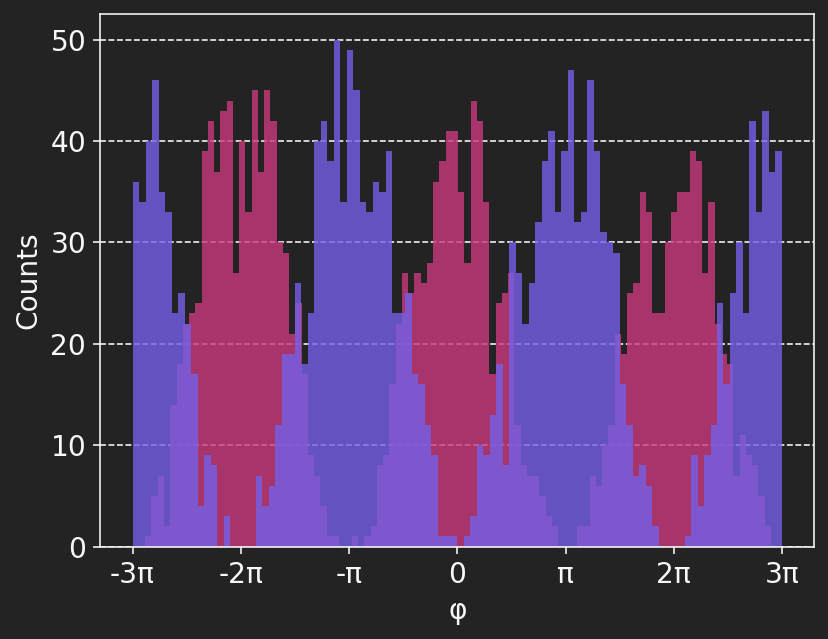

In [19]:
ax = plt.subplot()
plt.hist(φ_hit2_t, bins=100, color='#c93a7f',alpha=0.8)
plt.hist(φ_hit2_b, bins=100, color='#745fe8',alpha=0.8)
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.ylabel('Counts',fontsize=14)
ax.set_axisbelow(True)
plt.grid(axis='y',linestyle='dashed')
plt.show()
plt.show()

In [20]:
z_hit2_t = np.random.uniform(-1,1,len(φ_hit2_t))
z_hit2_b = np.random.uniform(-1,1,len(φ_hit2_b))

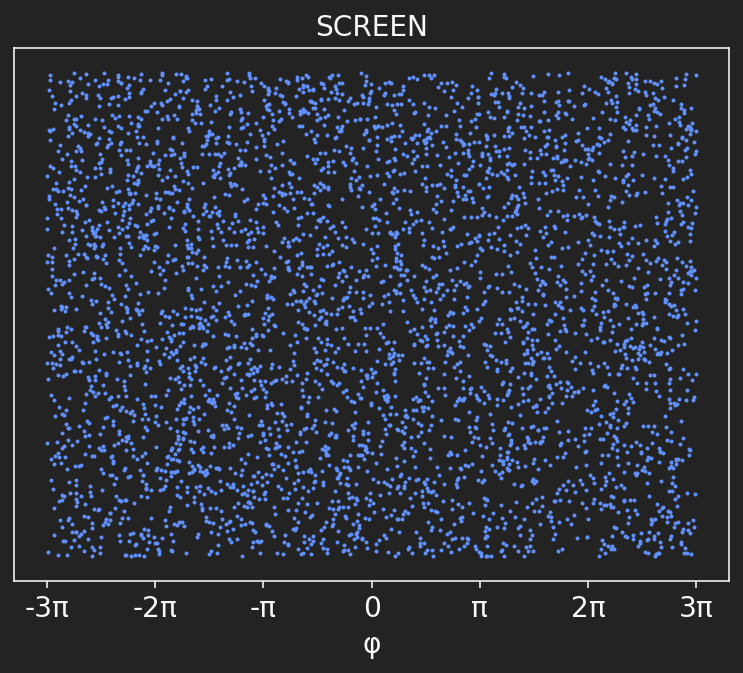

In [21]:
plt.scatter(φ_hit2_t+φ_hit2_b, np.append(z_hit2_t,z_hit2_b), s = 1, color='#6190fb')
plt.tick_params(axis='both', left=False, labelleft=False)
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.title('SCREEN', fontsize=14)
plt.show()

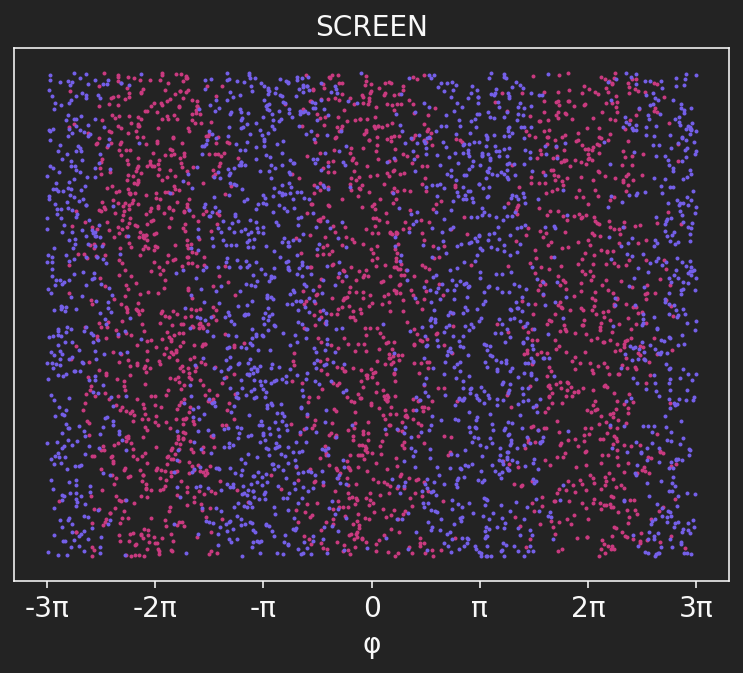

In [22]:
plt.scatter(φ_hit2_t, z_hit2_t, s = 1, color='#c93a7f')
plt.scatter(φ_hit2_b, z_hit2_b, s = 1, color='#745fe8')
plt.tick_params(axis='both', left=False, labelleft=False)
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.title('SCREEN', fontsize=14)
plt.show()

### On HW

In [23]:
from qiskit_ibm_provider import IBMProvider, least_busy
from qiskit_ibm_provider.job import job_monitor

In [24]:
provider = IBMProvider()

qpu = provider.get_backend('ibm_nairobi')
print(qpu.name)

ibm_nairobi


In [25]:
qc_trans = transpile(qc2, backend=qpu)

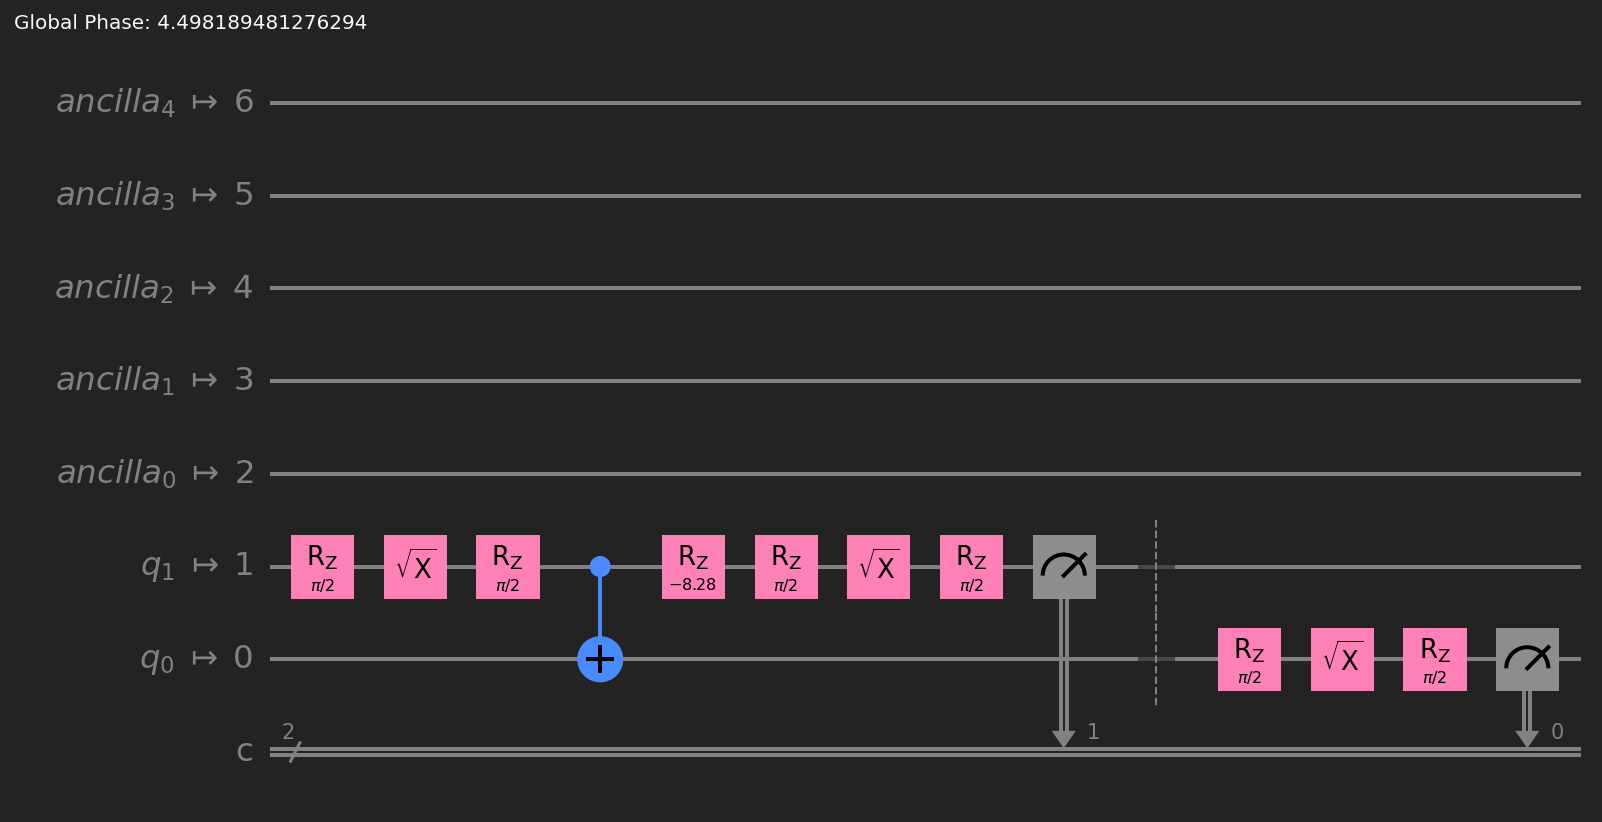

In [26]:
runs = 100
shots = 512
φ_lst = np.linspace(-3*π,3*π,runs)

circuits = []

for φ_val in φ_lst:
    qc_qpu = qc_trans.assign_parameters({φ:φ_val})
    circuits.append(qc_qpu)
    
circuits[6].draw()

In [27]:
job = qpu.run(circuits, shots=shots)
job_id = job.job_id()
print(job_id)

cmvz9t7sxt800084qj9g


In [28]:
retrieve_job = provider.retrieve_job(job_id)
retrieve_job.status()

<JobStatus.QUEUED: 'job is queued'>

In [29]:
qpu_results = job.result()

In [30]:
φ_hit_t = []
φ_hit_b = []

for i, circ in enumerate(circuits):
    counts_t = qpu_results.get_counts(circ).get('00')
    counts_b = qpu_results.get_counts(circ).get('01')
    if counts_t is not None:
        φ_hit_t += counts_t*[φ_lst[i]]
    if counts_b is not None:
        φ_hit_b += counts_b*[φ_lst[i]]

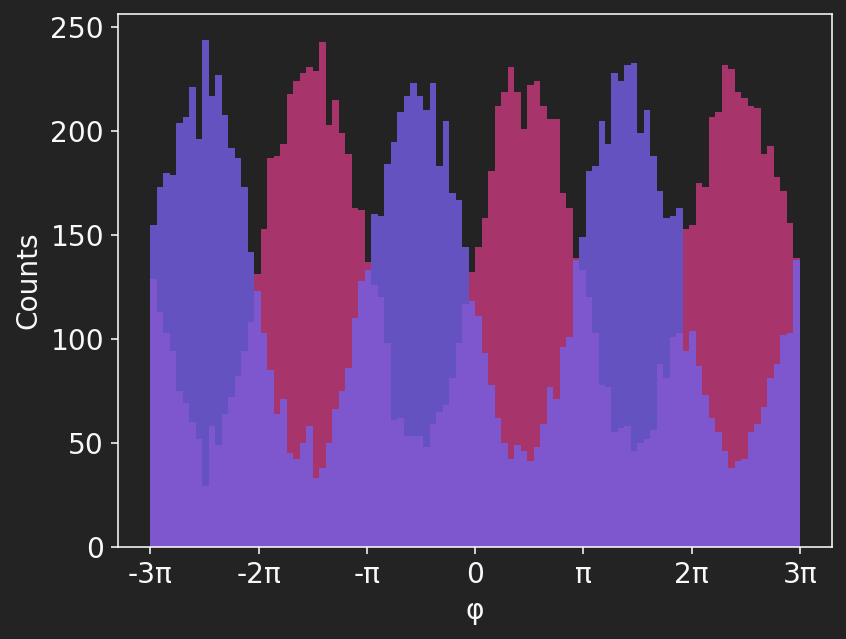

In [38]:
ax = plt.subplot()
plt.hist(φ_hit_t, bins=100, color='#c93a7f',alpha=0.8)
plt.hist(φ_hit_b, bins=100, color='#745fe8',alpha=0.8)
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.grid(axis='y',linestyle='dashed')
plt.show()

In [31]:
z_hit_t = np.random.uniform(-1,1,len(φ_hit_t))
z_hit_b = np.random.uniform(-1,1,len(φ_hit_b))

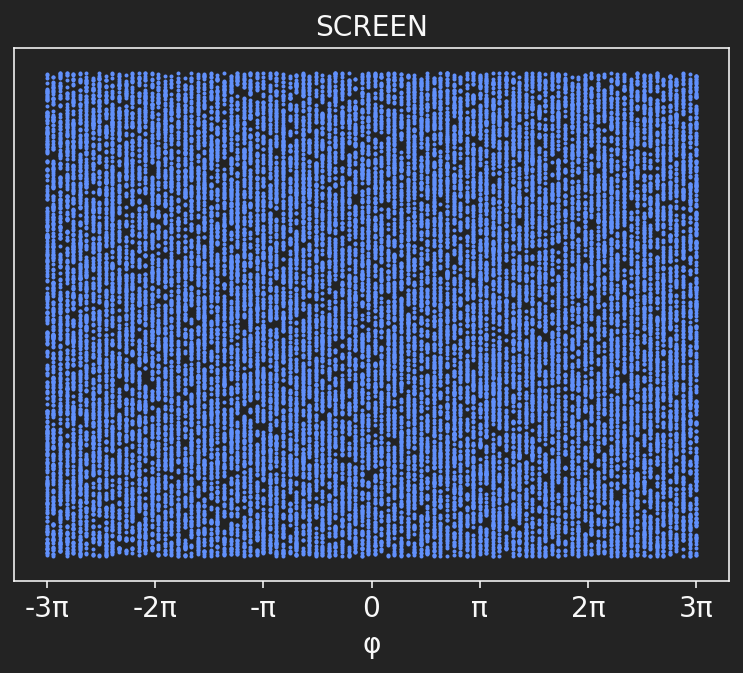

In [32]:
plt.scatter(φ_hit_t+φ_hit_b, np.append(z_hit_t,z_hit_b), s = 1, color='#6190fb')
plt.tick_params(axis='both', left=False, labelleft=False)
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.title('SCREEN', fontsize=14)
plt.show()

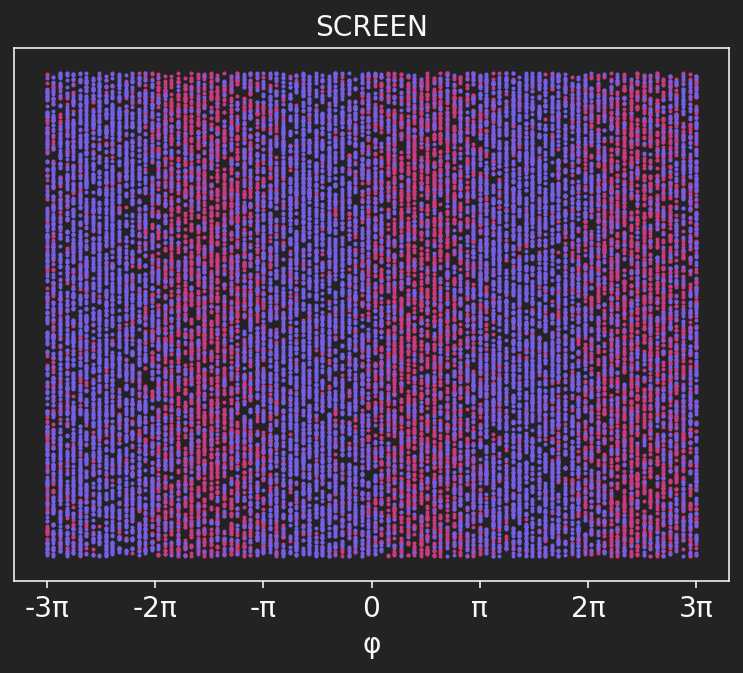

In [34]:
plt.scatter(φ_hit_t, z_hit_t, s = 1, color='#c93a7f')
plt.scatter(φ_hit_b, z_hit_b, s = 1, color='#745fe8')
plt.tick_params(axis='both', left=False, labelleft=False)
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.title('SCREEN', fontsize=14)
plt.show()